In [101]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

In [102]:
data = tf.keras.datasets.mnist

In [103]:
#train-test split--downloading the dataset
(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [104]:
#shape of the train and the test datasets
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


The above output shows for training images we have 60000 images, each of 28x28 resolution. Similarly for testing images, we have 10000 images, of the same resolution.

LABEL: 5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

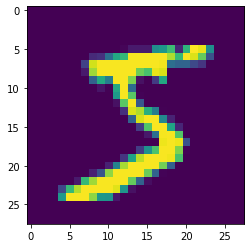

In [105]:
#displaying an image
index = 0 #any number between 0-59999, it will visualise that image
np.set_printoptions(linewidth=320)

#print the label and the image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

We can see that the above digit is indeed a number 5

In [106]:
#normalising the images for better performance of the CNN

training_images = training_images / 255.0
test_images = test_images / 255.0

In [107]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [108]:
#compilation and fitting of the model
model.compile(optimizer=tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics=['acc'])
hist = model.fit(training_images, training_labels, validation_split=0.3,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2805 - acc: 0.9135 - val_loss: 0.1504 - val_acc: 0.9544
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1236 - acc: 0.9630 - val_loss: 0.1300 - val_acc: 0.9607
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0924 - acc: 0.9719 - val_loss: 0.1147 - val_acc: 0.9662
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0712 - acc: 0.9792 - val_loss: 0.1153 - val_acc: 0.9672
Epoch 5/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0600 - acc: 0.9815 - val_loss: 0.1110 - val_acc: 0.9689
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0541 - acc: 0.9846 - val_loss: 0.1138 - val_acc: 0.9697
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0457 - acc: 0.9857 - val_loss: 0.1244 - val_acc: 0.9664
Epoch 8/10
1313/1313 [==============================] - 8s 6ms

In [109]:
#testing the model on the test data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1223 - acc: 0.9712


[0.12225045263767242, 0.9711999893188477]

The results thus show there is a slight overfitting

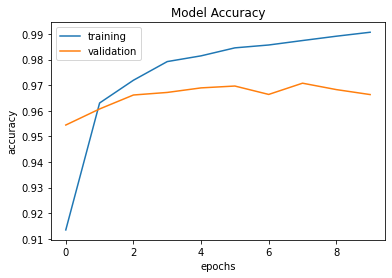

In [110]:
#visualisation of model accuracy and loss

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

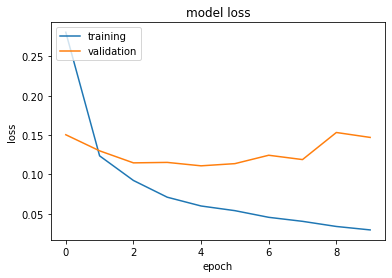

In [111]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

Introducing L2 regularisation

In [112]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu, 
                       kernel_regularizer=regularizers.l2(0.03),
                      bias_regularizer=regularizers.l2(0.01),
                      activity_regularizer=regularizers.l2(0.01)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [113]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 128)               100480    
                                                                 
 dense_79 (Dense)            (None, 128)               16512     
                                                                 
 dense_80 (Dense)            (None, 128)               16512     
                                                                 
 dense_81 (Dense)            (None, 128)               16512     
                                                                 
 dense_82 (Dense)            (None, 128)               16512     
                                                                 
 dense_83 (Dense)            (None, 10)              

In [114]:
#compilation and fitting of the model
model.compile(optimizer=tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics=['acc'])
hist = model.fit(training_images, training_labels, validation_split=0.3,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.7323 - acc: 0.8868 - val_loss: 0.4555 - val_acc: 0.9214
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4054 - acc: 0.9317 - val_loss: 0.3814 - val_acc: 0.9365
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3788 - acc: 0.9371 - val_loss: 0.3856 - val_acc: 0.9296
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3586 - acc: 0.9402 - val_loss: 0.3538 - val_acc: 0.9399
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3437 - acc: 0.9420 - val_loss: 0.3305 - val_acc: 0.9488
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3347 - acc: 0.9455 - val_loss: 0.3227 - val_acc: 0.9488
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3247 - acc: 0.9449 - val_loss: 0.3288 - val_acc: 0.9461
Epoch 8/10
1313/1313 [==============================] - 9s 7ms

In [115]:
#testing the model on the test data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3010 - acc: 0.9505


[0.3009975552558899, 0.9505000114440918]

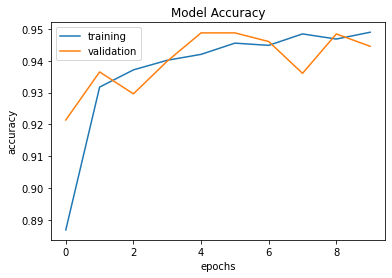

In [116]:
#visualisation of model accuracy and loss

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

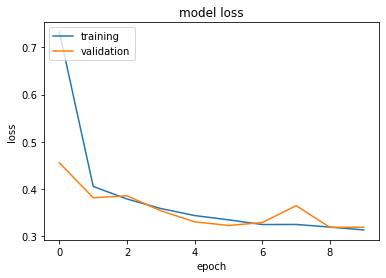

In [117]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

So we see, the performance has improved after using regularisers

Implementing callbacks, based on training accuracy

In [118]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("Reached 99% accuracy so cancelling training")
            self.model.stop_training=True

In [119]:
callbacks = myCallback()

Now implementing the above network with early stopping

In [120]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu, 
                       kernel_regularizer=regularizers.l2(0.03),
                      bias_regularizer=regularizers.l2(0.01),
                      activity_regularizer=regularizers.l2(0.01)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [121]:
#compilation and fitting of the model
model.compile(optimizer=tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics=['acc'])
hist = model.fit(training_images, training_labels, validation_split=0.3,epochs=10, callbacks=[callbacks])

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7343 - acc: 0.8913 - val_loss: 0.4587 - val_acc: 0.9184
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4200 - acc: 0.9293 - val_loss: 0.3793 - val_acc: 0.9373
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3822 - acc: 0.9360 - val_loss: 0.4076 - val_acc: 0.9229
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3668 - acc: 0.9379 - val_loss: 0.3697 - val_acc: 0.9331
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3463 - acc: 0.9423 - val_loss: 0.3460 - val_acc: 0.9394
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3383 - acc: 0.9428 - val_loss: 0.3479 - val_acc: 0.9452
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3305 - acc: 0.9458 - val_loss: 0.3403 - val_acc: 0.9447
Epoch 8/10
1313/1313 [==============================] - 9s 7ms

Plotting graphs of validation and accuracy

In [122]:
#testing the model on the test data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3023 - acc: 0.9558


[0.30234044790267944, 0.9557999968528748]

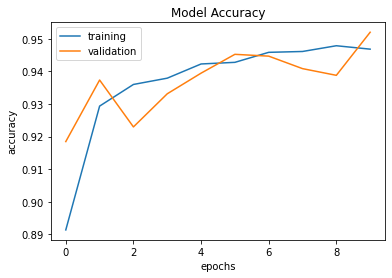

In [123]:
#visualisation of model accuracy and loss

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

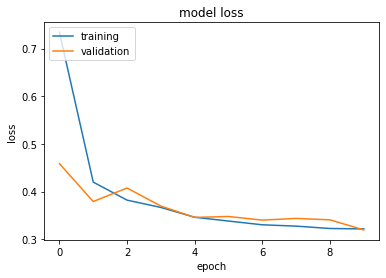

In [124]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()